<a href="https://colab.research.google.com/github/sijixx/Predicting-Train-Disaster-Survival-with-Decision-Tree-and-Random-Forest/blob/main/Predicting_Train_Disaster_Survival_with_Decision_Tree_and_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import files
uploaded= files.upload()

Saving train.xlsx to train.xlsx


In [2]:
import io
df= pd.read_excel(io.BytesIO(uploaded['train.xlsx']))
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **Data** **PreProcessing**

In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Cabin'].fillna((0), inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


In [5]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [ ]:
df.drop(['Cabin'],axis=1,inplace=True)
df.drop(['Embarked'],axis=1,inplace=True)

In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare'],
      dtype='object')

In [9]:
gender= pd.get_dummies(df["Sex"],drop_first='first') # get_dummies converts categorical data to binaries
df['Gender']=gender
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,1


In [10]:
df.drop(['Name','Sex','Ticket'], axis=1,inplace=True) # I don't need these data
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,1,0,3,22.000000,1,0,7.2500,1
1,2,1,1,38.000000,1,0,71.2833,0
2,3,1,3,26.000000,0,0,7.9250,0
3,4,1,1,35.000000,1,0,53.1000,0
4,5,0,3,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,1
887,888,1,1,19.000000,0,0,30.0000,0
888,889,0,3,29.699118,1,2,23.4500,0
889,890,1,1,26.000000,0,0,30.0000,1


In [11]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Gender         0
dtype: int64

**Data Modeling** 

In [12]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# first decision tree
x= df[['PassengerId','Pclass','Fare']]
y= df['Survived']

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3)

In [13]:
df_tree= tree.DecisionTreeClassifier()
df_tree.fit(x_train,y_train)
df_pred= df_tree.predict(x_test)
print("score:{}".format(accuracy_score(y_test,df_pred)*100))

score:58.95522388059702


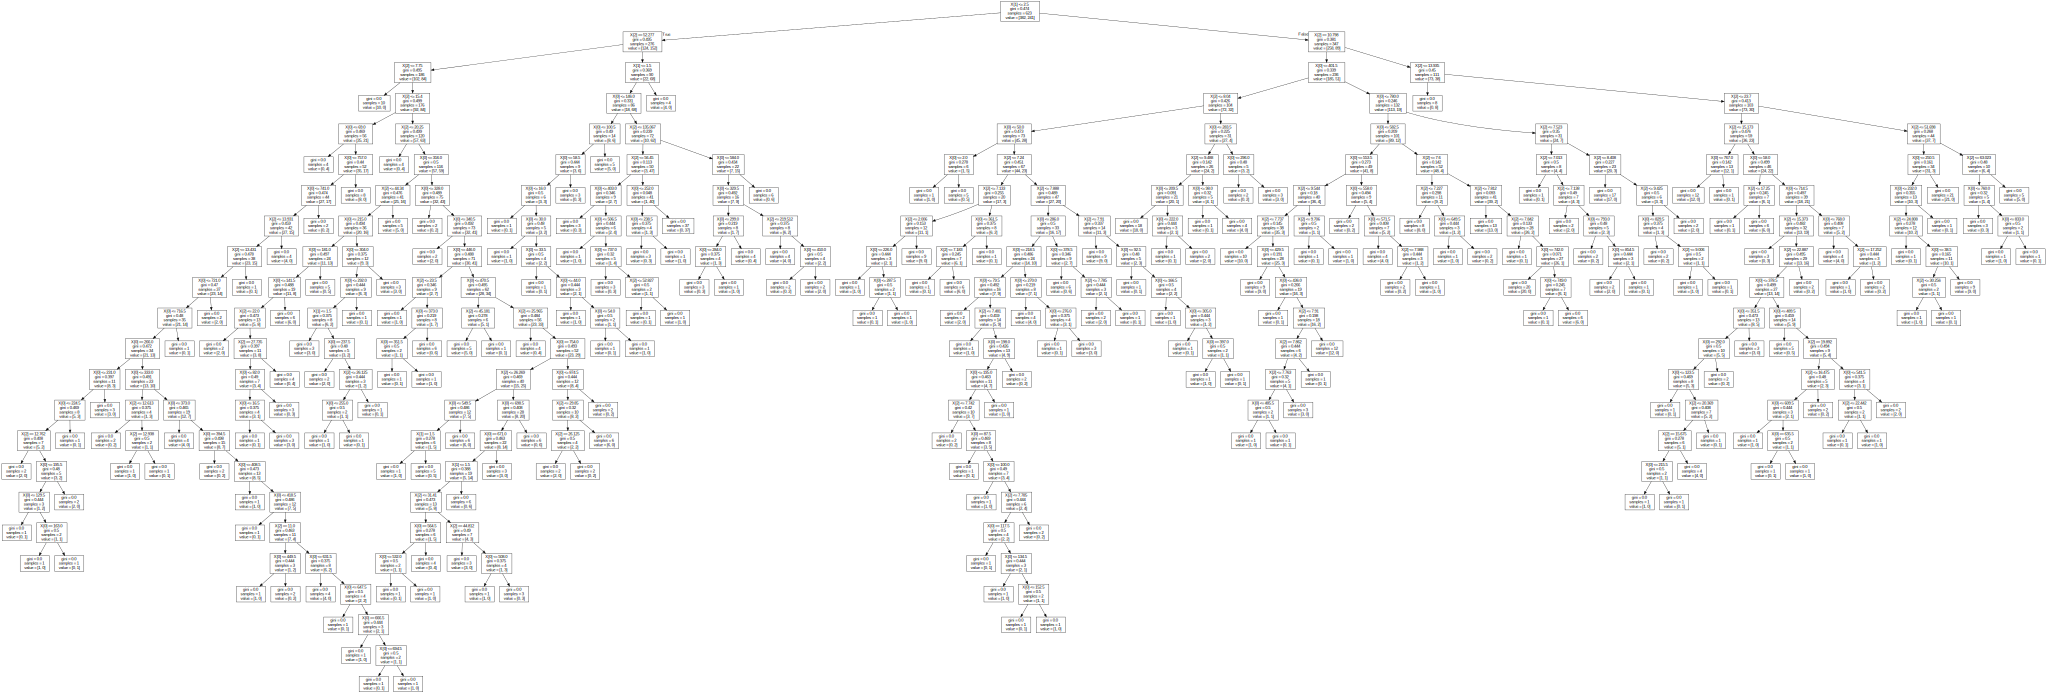

In [15]:
import graphviz
df_dot= tree.export_graphviz(df_tree,out_file=None)
df_graph= graphviz.Source(df_dot)
df_graph.render('df')
df_graph

**Let's Prune our data.**

In [16]:
dftree= tree.DecisionTreeClassifier(criterion='gini',splitter='best',max_leaf_nodes=10,min_samples_leaf=5,max_depth=5)
dftree.fit(x_train,y_train)
dfpred= dftree.predict(x_test)
print("score:{}".format(accuracy_score(y_test,dfpred)*100))

score:70.52238805970148


**Let's visualize our pruned tree.**

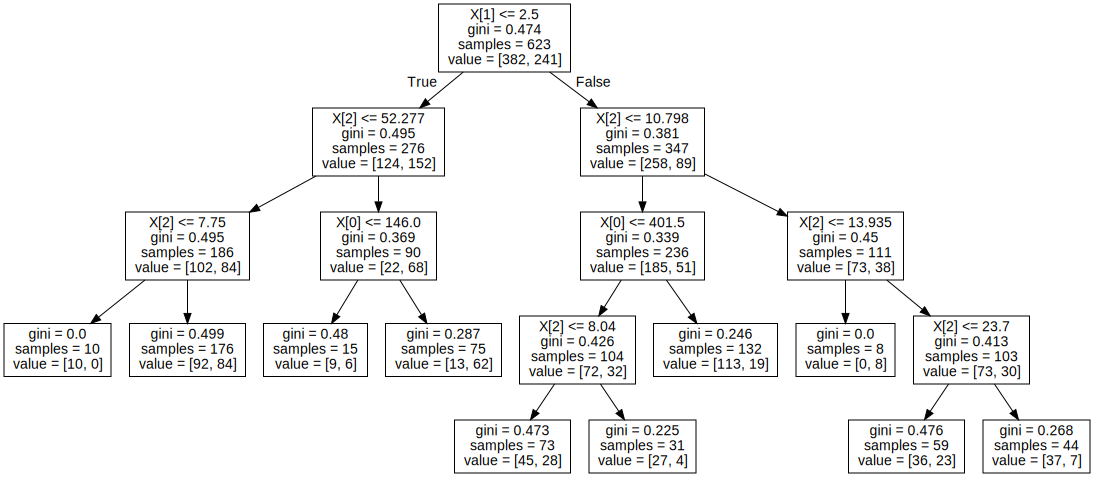

In [17]:
import graphviz
df_= tree.export_graphviz(dftree,out_file=None)
df_graph_= graphviz.Source(df_)
df_graph_.render('df')
df_graph_

In [18]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

x= df[['SibSp','Parch','Age','Gender']]
y= df['Survived']

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3)

In [19]:
df_tree_= tree.DecisionTreeClassifier()
df_tree_.fit(x_train,y_train)
df_tree_pred= df_tree_.predict(x_test)
print("score:{}".format(accuracy_score(y_test,df_tree_pred)*100))

score:77.61194029850746


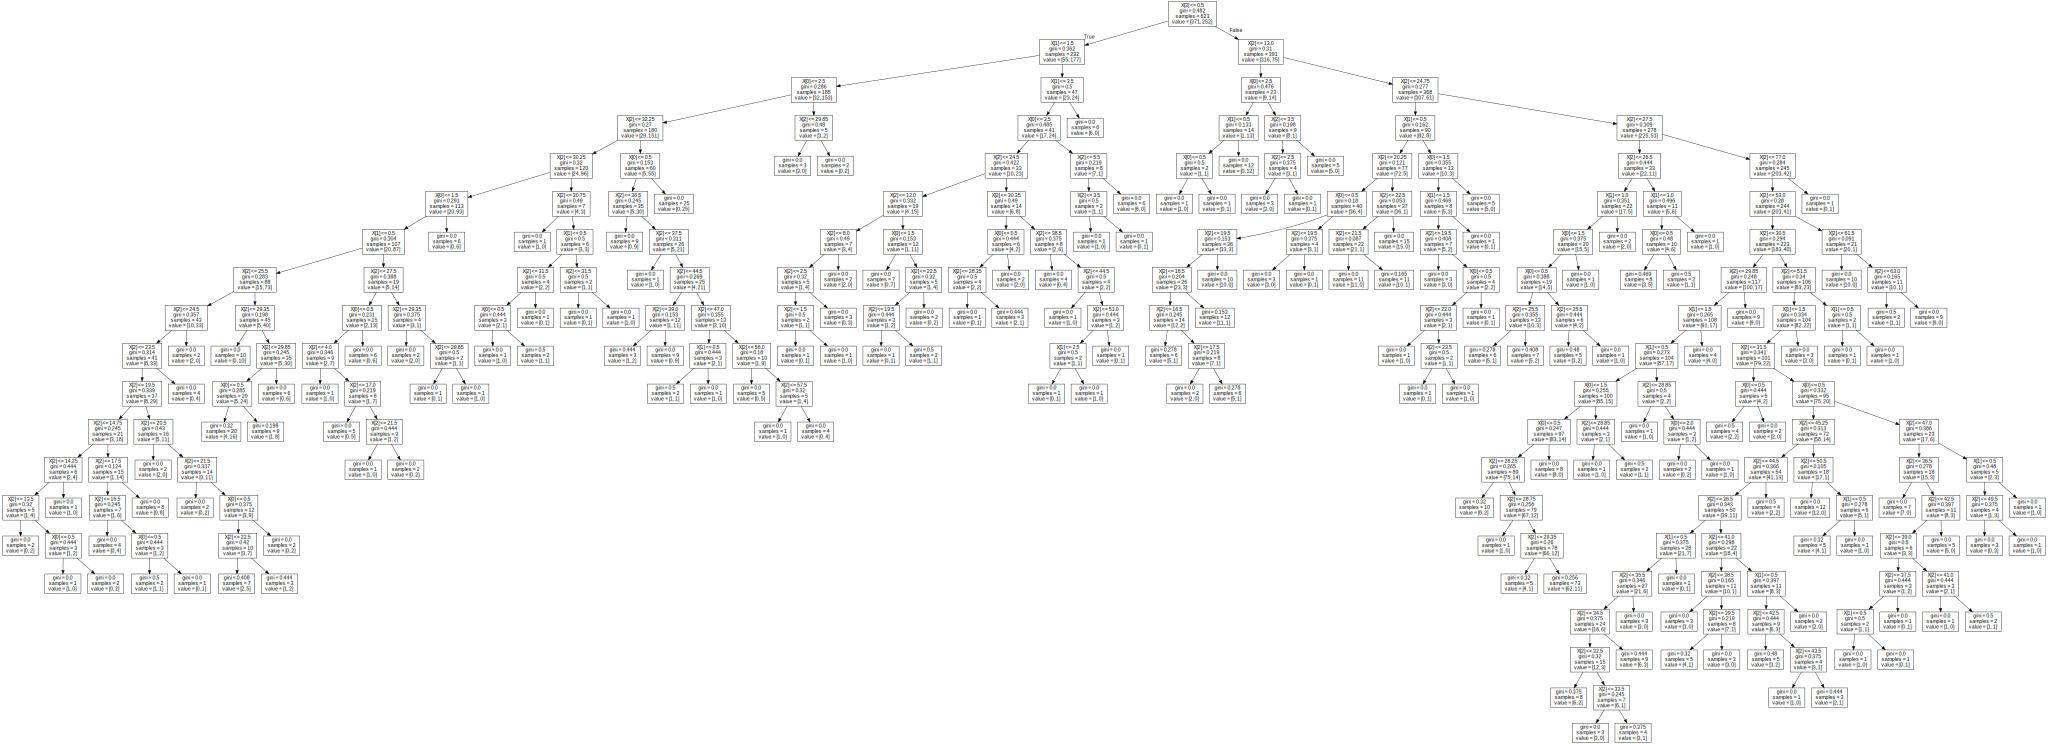

In [20]:
import graphviz
df_d= tree.export_graphviz(df_tree_,out_file=None)
df_d_graph=graphviz.Source(df_d)
df_d_graph.render('df')
df_d_graph

In [21]:
df_d_= tree.DecisionTreeClassifier(criterion='gini',splitter='random',max_leaf_nodes=12,min_samples_leaf=6,max_depth=6)
df_d_.fit(x_train,y_train)
df_d_pred= df_d_.predict(x_test)
print("score:{}".format(accuracy_score(y_test, df_d_pred)*100))

score:76.11940298507463


Using the age, gender, parch and the sibsp data values gave a higer model prediction value over using the passenger id, fare and class values. And prunning helps the models predict more accurately.

**Randon forest**

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

x = df[['SibSp','Parch','Age','Gender']]
y= df['Survived']

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3)

df_ran= RandomForestClassifier(n_estimators=10)
df_ran.fit(x_train,y_train)
df_pred_= df_ran.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, df_pred)*100)

Accuracy: 46.64179104477612


Using the decision tree to model a random forest reduces the accuracy of the prediction even with the same data values.